In [72]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys,walk_through_dir,unzip_data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis


loaded_model = tf.keras.models.load_model("drive/MyDrive/Tensorflow/model_1.keras")

# Make predictions with our model
pred_probs = loaded_model.predict(test_data,verbose = 1) # Set verbosity to see how long is left

# Get the pred classes of each label
pred_classes = pred_probs.argmax(axis = 1)

# How do they look
pred_classes[:10]



--2025-06-29 18:42:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-06-29 18:42:58 (123 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

--2025-06-29 18:42:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response.

array([52,  0,  0,  8,  8, 78, 31, 46,  0,  0])

In [73]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # Currently test labels look like : [0,0,0,..,1,...0] we want the index value
y_labels[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [74]:
class_names = test_data.class_names

In [75]:
# We need to make sum changes to our make_confusion_matrix to ensure the x-labels print vertically.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Changed (plot x-labels vertically)
  plt.xticks(rotation = 70, fontsize = text_size)
  plt.yticks(fontsize = text_size)
  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [76]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize = (101,101),
                      text_size = 20)

Output hidden; open in https://colab.research.google.com to view.

## Let's keep the evaluation train , time for a classification report.

Sklearn has a helpful function for acquiring many different classification metrics per class (eg - precision, f1 and recall) called classification_report let's try it.

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.38      0.17      0.23       250
           1       0.71      0.65      0.68       250
           2       0.64      0.63      0.63       250
           3       0.72      0.62      0.67       250
           4       0.63      0.55      0.59       250
           5       0.48      0.54      0.51       250
           6       0.75      0.82      0.78       250
           7       0.88      0.76      0.81       250
           8       0.29      0.62      0.40       250
           9       0.51      0.65      0.57       250
          10       0.59      0.48      0.53       250
          11       0.73      0.58      0.65       250
          12       0.81      0.56      0.66       250
          13       0.65      0.58      0.61       250
          14       0.58      0.61      0.60       250
          15       0.44      0.46      0.45       250
          16       0.71      0.56      0.63       250
          17       0.47    

The numbers above give a great class by class evaluation of our model's predictions but with so many classes, they are quite hard to understand.
How about we create a visualization to get a better understanding ?

In [78]:
# Get a dictionary of classification report
classification_report_dict = classification_report(y_labels,pred_classes,output_dict = True)
classification_report_dict

{'0': {'precision': 0.375,
  'recall': 0.168,
  'f1-score': 0.23204419889502761,
  'support': 250.0},
 '1': {'precision': 0.7056277056277056,
  'recall': 0.652,
  'f1-score': 0.6777546777546778,
  'support': 250.0},
 '2': {'precision': 0.6408163265306123,
  'recall': 0.628,
  'f1-score': 0.6343434343434343,
  'support': 250.0},
 '3': {'precision': 0.7230046948356808,
  'recall': 0.616,
  'f1-score': 0.6652267818574514,
  'support': 250.0},
 '4': {'precision': 0.6301369863013698,
  'recall': 0.552,
  'f1-score': 0.5884861407249466,
  'support': 250.0},
 '5': {'precision': 0.4785714285714286,
  'recall': 0.536,
  'f1-score': 0.5056603773584906,
  'support': 250.0},
 '6': {'precision': 0.7490909090909091,
  'recall': 0.824,
  'f1-score': 0.7847619047619048,
  'support': 250.0},
 '7': {'precision': 0.8790697674418605,
  'recall': 0.756,
  'f1-score': 0.8129032258064516,
  'support': 250.0},
 '8': {'precision': 0.29213483146067415,
  'recall': 0.624,
  'f1-score': 0.3979591836734694,
  'sup

In [79]:
class_names[70]

'pad_thai'

In [80]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for key,value in classification_report_dict.items():
  if key == 'accuracy' :
    break
  else:
    class_f1_scores[class_names[int(key)]] = value['f1-score']
class_f1_scores

{'apple_pie': 0.23204419889502761,
 'baby_back_ribs': 0.6777546777546778,
 'baklava': 0.6343434343434343,
 'beef_carpaccio': 0.6652267818574514,
 'beef_tartare': 0.5884861407249466,
 'beet_salad': 0.5056603773584906,
 'beignets': 0.7847619047619048,
 'bibimbap': 0.8129032258064516,
 'bread_pudding': 0.3979591836734694,
 'breakfast_burrito': 0.5694200351493849,
 'bruschetta': 0.5298013245033113,
 'caesar_salad': 0.6457399103139013,
 'cannoli': 0.6635071090047393,
 'caprese_salad': 0.6101694915254238,
 'carrot_cake': 0.59765625,
 'ceviche': 0.4474708171206226,
 'cheese_plate': 0.6263982102908278,
 'cheesecake': 0.49523809523809526,
 'chicken_curry': 0.5373134328358209,
 'chicken_quesadilla': 0.6220302375809935,
 'chicken_wings': 0.7256317689530686,
 'chocolate_cake': 0.5972850678733032,
 'chocolate_mousse': 0.3722772277227723,
 'churros': 0.7743362831858407,
 'clam_chowder': 0.7380073800738007,
 'club_sandwich': 0.6807610993657506,
 'crab_cakes': 0.5204460966542751,
 'creme_brulee': 0.74

In [81]:
# Turn f1-scores into dataframes for visualisations
import pandas as pd
f1_scores = pd.DataFrame({'class_names':list(class_f1_scores.keys()),
                         'f1-scores':list(class_f1_scores.values())}).sort_values("f1-scores",ascending = False)
f1_scores

class_names  f1-scores
33        edamame   0.968254
63       macarons   0.895075
65        mussels   0.876543
86        sashimi   0.852525
88  seaweed_salad   0.850000
..            ...        ...
93          steak   0.369427
82        ravioli   0.359447
99   tuna_tartare   0.340807
0       apple_pie   0.232044
39      foie_gras   0.212766

[101 rows x 2 columns]

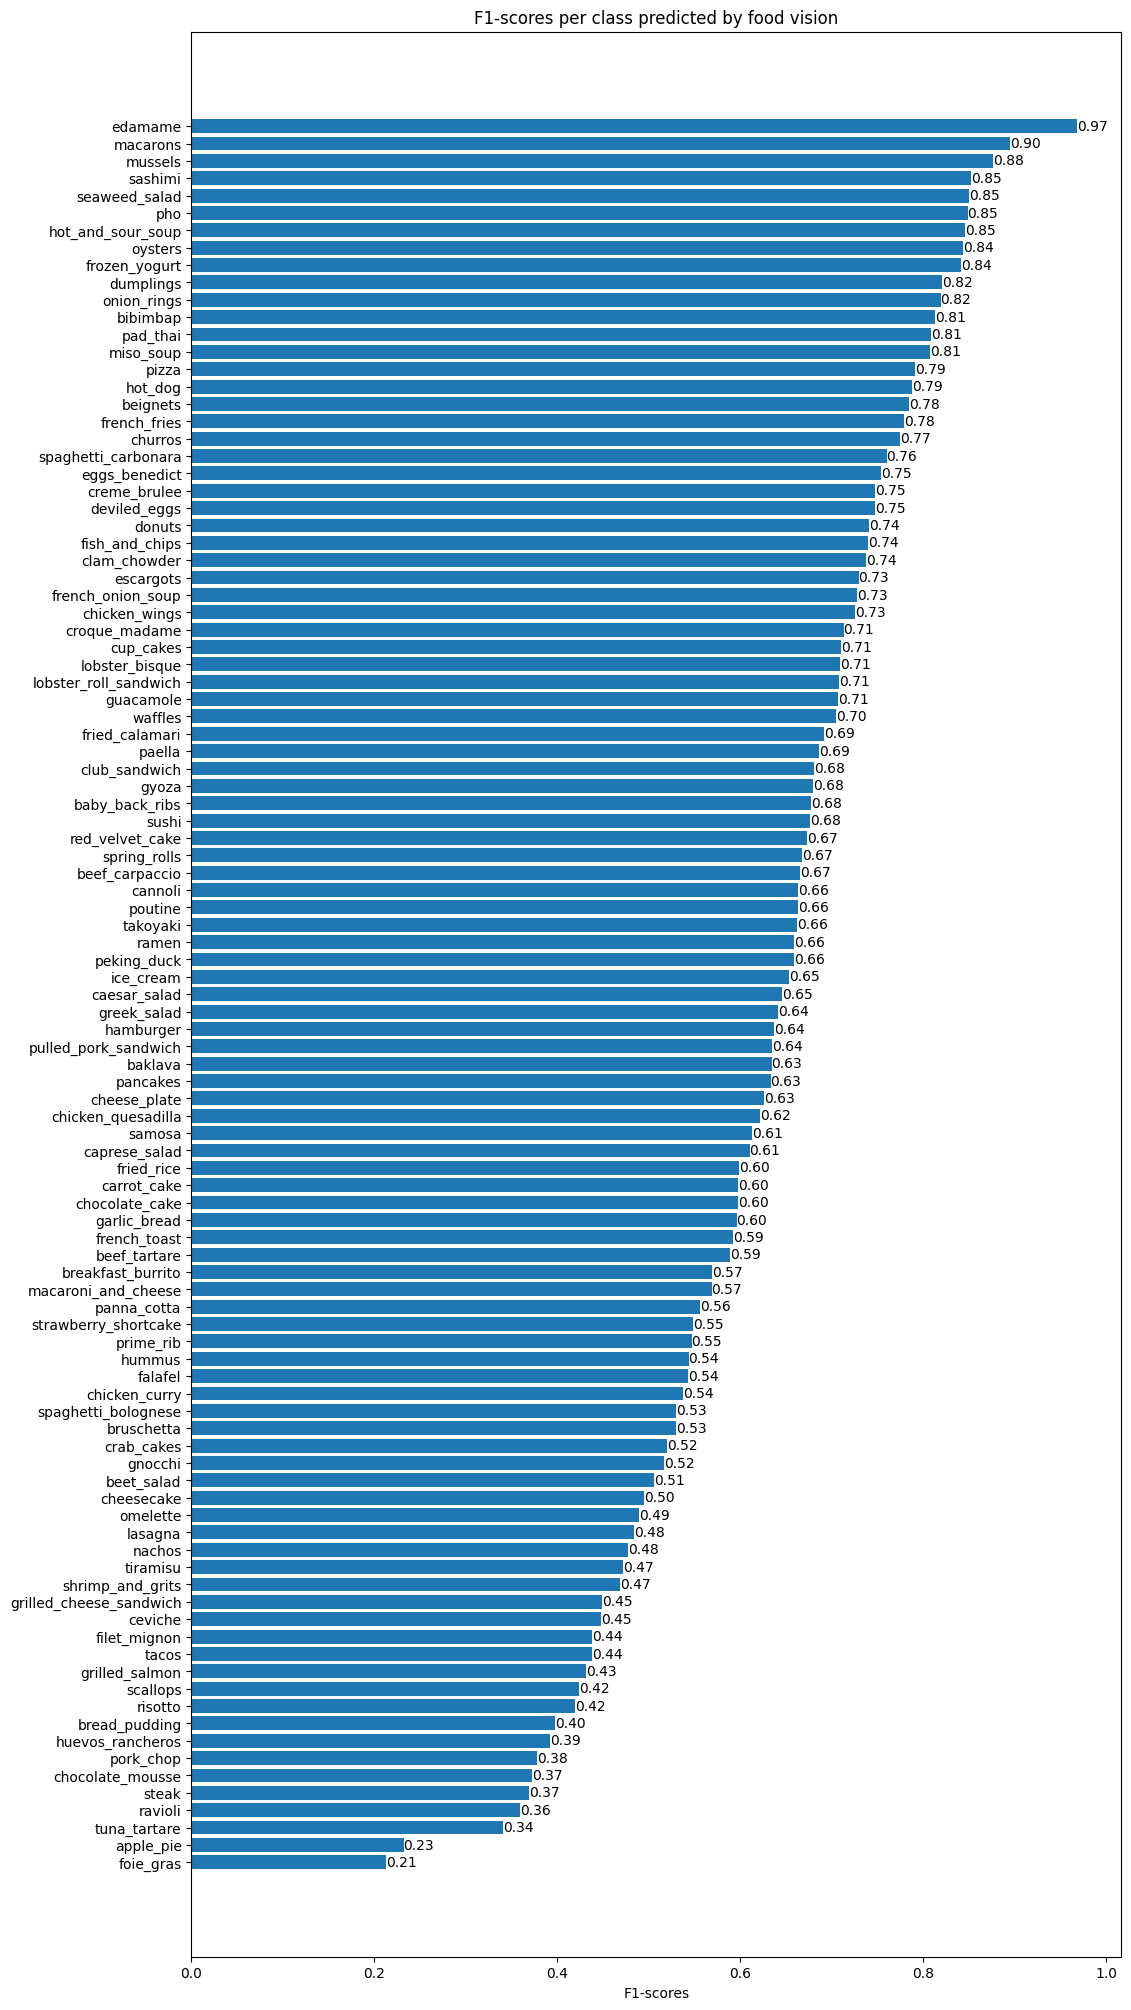

In [82]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,25))
scores = ax.barh( range(len(f1_scores)),
                  f1_scores['f1-scores'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores['class_names'])
ax.set_xlabel("F1-scores")
ax.set_title("F1-scores per class predicted by food vision")
ax.invert_yaxis() # Reverse order of plot
ax.bar_label(scores, fmt='%.2f'); # Writes its value in horizontal bars

## Visualising predictions on custom images

Now this is the real test how does our model go on images not even in our test dataset (images of our own).

To visualize our model's prediction on our images, we'll need a function to load and preprocess images, specifically it will need to:
* Read in a target image filepath using tf.io.read_file()
* Turn the image into a Tensor using tf.io.decode_image()
* Resize the image tensor to be the same size as the images our model has trained on using tf.image.resize()
* Rescale the image to get all of the pixel values b/w 0&1 (if necessary)

In [83]:
# Create a function to load and prepare images
def load_and_prep_image(filename,img_shape = 224, scale = True):
  """
  Reads in an image from filename , turns it into a tensor and reshape into specified shape (img_shape,img_shape,color_channels = 3).

  Args:
  filename(str): Path to target image
  image_shape(int): height/width dimension of target image size
  scale(bool): rescale pixel values from 0-255 to 0-1.

  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels = 3)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape,img_shape])

  # Scale ? Yes/No
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # Dont need to rescale images for EfficientNet models in TensorFlow


Now we've  got a function to load and prepare target images, lets now write some code to visualise images, their target label and our model's predictions,

Specifically, we'll write some code to:
1. Load a few random images from the test dataset
2. Make predictions on the loaded images
3. Plot the original image(s) along with the model's prediction, prediction probability and truth label

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


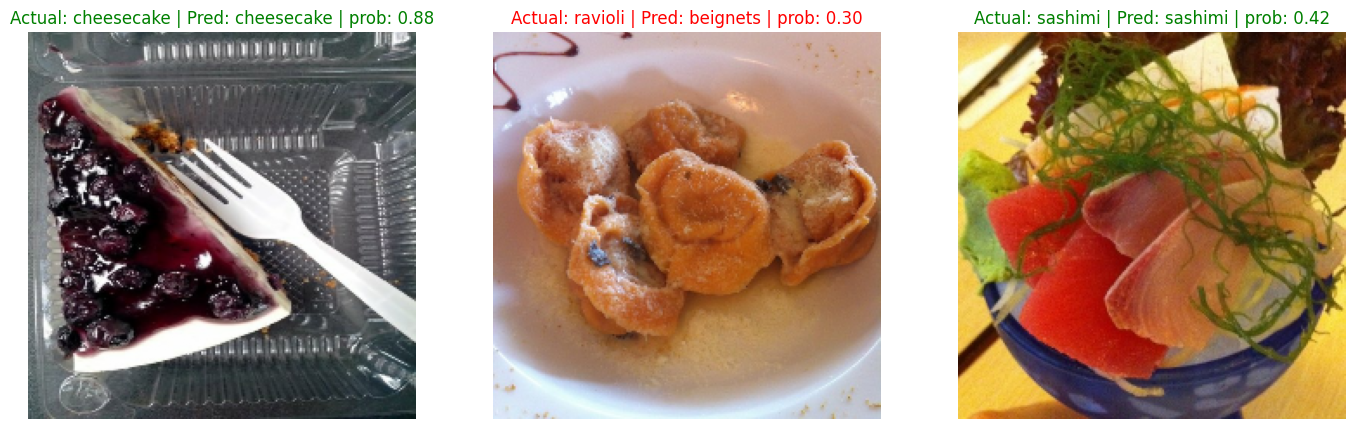

In [84]:
import os
import random

plt.figure(figsize = (17,10))

for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + '/' + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make prediction
  img = load_and_prep_image(filepath,scale = False,img_shape = 224)
  img_expanded = tf.expand_dims(img,axis = 0)
  pred_prob = loaded_model.predict(img_expanded) # Get predictions probab.. array
  pred_class = class_names[pred_prob.argmax()] # Get highest predictions class

  # Plot the images
  plt.subplot(1,3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make it green
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"Actual: {class_name} | Pred: {pred_class} | prob: {pred_prob.max():.2f}",color = title_color)
  plt.axis(False);

## Finding the most wrong predictions
To find out where our model is most wrong, let's write some code to find out the following:
1. Get all of the image file paths in the test dataset using list_files() method.
2. Create a pandas DataFrame of the image filepaths, ground truth labels, predicted classes (from our model), max prediction probabilities,prediction class names, ground truth class names.
3. Use our DataFrame to find all the wrong predictions (where the ground truth label doesn't match the prediction)
4. Sort the DataFrame based on wrong predictions (have the highest prob predictions at the top ).
5. Visualize the images with the highest prediction probabilities but have the wrong predictions.

In [85]:
# 1. Get all of the image file paths in the test dataset using list_files() method.
dataset = tf.data.Dataset.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",shuffle = False)
filepaths = []
for filepath in dataset:
  filepaths.append(filepath.numpy().decode("utf-8"))

In [86]:
# 2. Create a pandas DataFrame
df = pd.DataFrame({"img_path":filepaths,
                  "y_true":y_labels,
                   "predicted_class":pred_classes,
                    "pred_conf": pred_probs.max(axis = 1),# Get max prob of that class
                     "y_true_classname": [class_names[i] for i in y_labels],
                      "y_pred_classname": [class_names[i] for i in pred_classes]})
display(df.head())

img_path  y_true  predicted_class  \
0  /content/101_food_classes_10_percent/test/appl...       0               52   
1  /content/101_food_classes_10_percent/test/appl...       0                0   
2  /content/101_food_classes_10_percent/test/appl...       0                0   
3  /content/101_food_classes_10_percent/test/appl...       0                8   
4  /content/101_food_classes_10_percent/test/appl...       0                8   

   pred_conf y_true_classname y_pred_classname  
0   0.271922        apple_pie            gyoza  
1   0.618263        apple_pie        apple_pie  
2   0.403113        apple_pie        apple_pie  
3   0.553662        apple_pie    bread_pudding  
4   0.907641        apple_pie    bread_pudding

In [87]:
# 3. Use our DataFrame to find all of the wrong predictions (where the ground truth label doesn't match the prediction)
df["pred_correct"] = df["y_true"] == df["predicted_class"]
display(df.head())

img_path  y_true  predicted_class  \
0  /content/101_food_classes_10_percent/test/appl...       0               52   
1  /content/101_food_classes_10_percent/test/appl...       0                0   
2  /content/101_food_classes_10_percent/test/appl...       0                0   
3  /content/101_food_classes_10_percent/test/appl...       0                8   
4  /content/101_food_classes_10_percent/test/appl...       0                8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.271922        apple_pie            gyoza         False  
1   0.618263        apple_pie        apple_pie          True  
2   0.403113        apple_pie        apple_pie          True  
3   0.553662        apple_pie    bread_pudding         False  
4   0.907641        apple_pie    bread_pudding         False

In [88]:
# 4. Sort our dataframe to have most wrong predictions at the top
top_100_wrong = df[df["pred_correct"] == False].sort_values("pred_conf",ascending = False)[:100]
display(top_100_wrong.head())

img_path  y_true  \
9690   /content/101_food_classes_10_percent/test/fish...      38   
18001  /content/101_food_classes_10_percent/test/panc...      72   
22044  /content/101_food_classes_10_percent/test/seaw...      88   
9402   /content/101_food_classes_10_percent/test/file...      37   
5420   /content/101_food_classes_10_percent/test/choc...      21   

       predicted_class  pred_conf y_true_classname  y_pred_classname  \
9690                20   0.999542   fish_and_chips     chicken_wings   
18001               67   0.999510         pancakes          omelette   
22044                5   0.999377    seaweed_salad        beet_salad   
9402                79   0.998921     filet_mignon         prime_rib   
5420                22   0.998594   chocolate_cake  chocolate_mousse   

       pred_correct  
9690          False  
18001         False  
22044         False  
9402          False  
5420          False

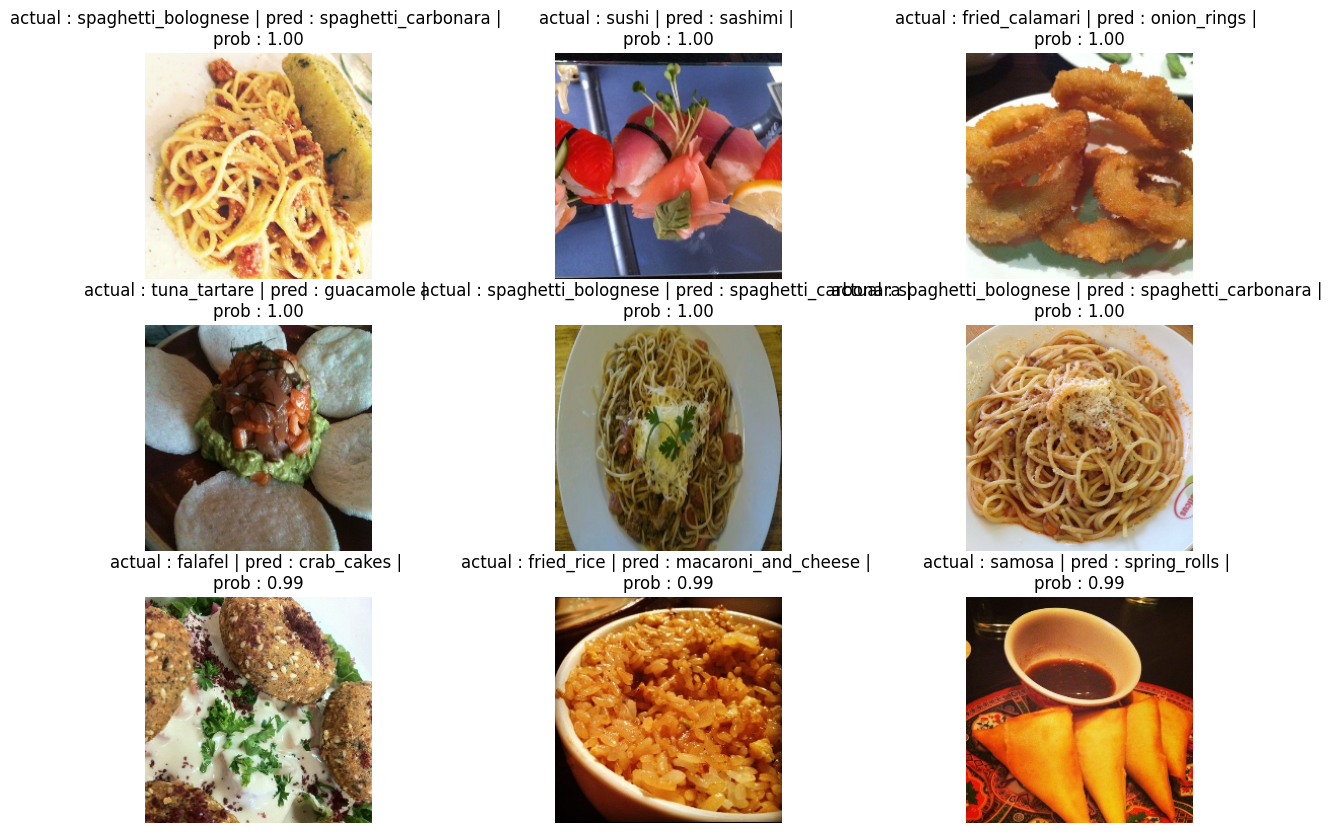

In [89]:
# 5. Visualize the images with the highest prediction probabilities but have the wrong predictions.
images_to_view = 9
start_index = 10
plt.figure(figsize = (15,10))
for i,row in enumerate(top_100_wrong[start_index:start_index + images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep_image(row[1],scale = False,img_shape = 224)
  _,_,_,_,pred_prob,true_class,pred_class,_ = row
  plt.imshow(img/255.)
  plt.title(f"actual : {true_class} | pred : {pred_class} | \nprob : {pred_prob:.2f}")
  plt.axis(False);

## Test our model on our own custom images

In [90]:
# Get custom images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
unzip_data("custom_food_images.zip")

--2025-06-29 18:53:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  50.2MB/s    in 0.3s    

2025-06-29 18:53:24 (50.2 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [92]:
# Get the custom food images filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("/content/custom_food_images")]
custom_food_images

['custom_food_images/pizza-dad.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/ramen.jpeg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


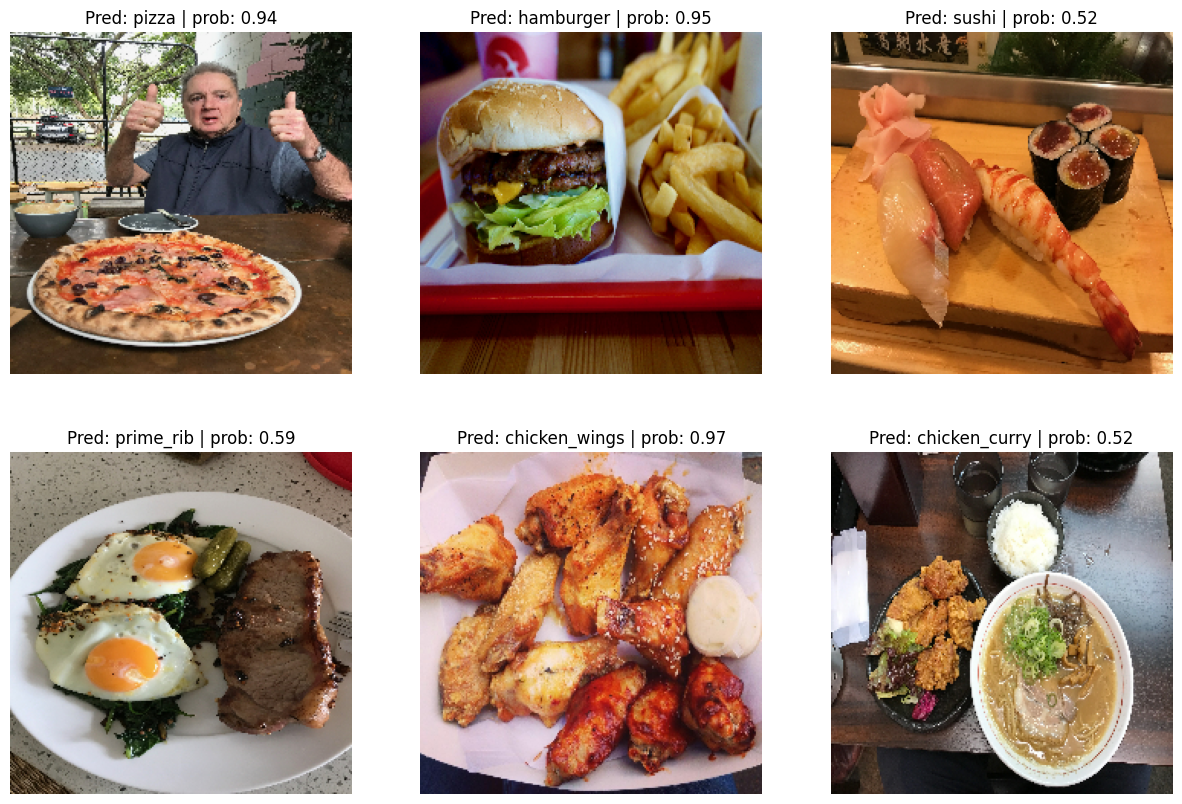

In [98]:
# Make predictions
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(custom_food_images):
  img = load_and_prep_image(img_path,scale = False)
  pred_prob = loaded_model.predict(tf.expand_dims(img,axis = 0)) # make prediction on image with shape [1,224,224,3]
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(2,3,i+1)
  plt.imshow(img/255.)
  # The actual class is unknown for custom images, so we only display the predicted class and probability
  plt.title(f"Pred: {pred_class} | prob: {pred_prob.max():.2f}")
  plt.axis(False);

In [95]:
len(custom_food_images)

6